IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


IMPORT DATASET

In [2]:
dataset = pd.read_csv('airline_sentiment.csv')
dataset

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text
0,neutral,1.0000,Customer Service Issue,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,0.3486,Customer Service Issue,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,Customer Service Issue,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...,...,...
14635,positive,0.3487,Customer Service Issue,0.0000,American,@AmericanAir thank you we got on a different f...
14636,negative,1.0000,Customer Service Issue,1.0000,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,1.0000,Customer Service Issue,NaN,American,@AmericanAir Please bring American Airlines to...
14638,negative,1.0000,Customer Service Issue,0.6659,American,"@AmericanAir you have my money, you change my ..."


MELAKUKAN PROSES CLEANING DATA

In [3]:
dataset.shape

(14640, 6)

In [4]:
dataset = dataset.drop_duplicates(subset='text')

In [5]:
dataset.duplicated().sum()

0

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.isnull().sum()

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
text                            0
dtype: int64

In [8]:
dataset.shape

(10410, 6)

In [9]:
def cleaned_tweet(text):
    pattern = r'@\w+'
    cleaned_text = re.sub(pattern, '', text)
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

dataset['text'] = dataset['text'].apply(cleaned_tweet)

In [10]:
dataset['text'] = dataset['text'].str.lower()
dataset

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text
1,positive,0.3486,Customer Service Issue,0.0000,Virgin America,plus you've added commercials to the experienc...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,"it's really aggressive to blast obnoxious ""ent..."
4,negative,1.0000,Can't Tell,1.0000,Virgin America,and it's a really big bad thing about it
5,negative,1.0000,Can't Tell,0.6842,Virgin America,seriously would pay $30 a flight for seats tha...
6,positive,0.6745,Customer Service Issue,0.0000,Virgin America,"yes, nearly every time i fly vx this “ear worm..."
...,...,...,...,...,...,...
14634,negative,0.6684,Late Flight,0.6684,American,right on cue with the delays👌
14635,positive,0.3487,Customer Service Issue,0.0000,American,thank you we got on a different flight to chic...
14636,negative,1.0000,Customer Service Issue,1.0000,American,leaving over 20 minutes late flight. no warnin...
14638,negative,1.0000,Customer Service Issue,0.6659,American,"you have my money, you change my flight, and d..."


MELAKUKAN STOPWORD PADA TEKS

In [11]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

In [12]:
more_stop_words = ['english']

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

dataset['text'] = dataset['text'].apply(lambda x: stopword(x))
dataset.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text
1,positive,0.3486,Customer Service Issue,0.0000,Virgin America,plus you've added commercials to the experienc...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,"it's really aggressive to blast obnoxious ""ent..."
4,negative,1.0000,Can't Tell,1.0000,Virgin America,and it's a really big bad thing about it
5,negative,1.0000,Can't Tell,0.6842,Virgin America,seriously would pay $30 a flight for seats tha...
6,positive,0.6745,Customer Service Issue,0.0000,Virgin America,"yes, nearly every time i fly vx this “ear worm..."


TOKENISASI PADA TEKS

In [13]:
tokenized = dataset['text'].apply(lambda x:x.split())
tokenized

1        [plus, you've, added, commercials, to, the, ex...
3        [it's, really, aggressive, to, blast, obnoxiou...
4        [and, it's, a, really, big, bad, thing, about,...
5        [seriously, would, pay, $30, a, flight, for, s...
6        [yes,, nearly, every, time, i, fly, vx, this, ...
                               ...                        
14634                 [right, on, cue, with, the, delays👌]
14635    [thank, you, we, got, on, a, different, flight...
14636    [leaving, over, 20, minutes, late, flight., no...
14638    [you, have, my, money,, you, change, my, fligh...
14639    [we, have, 8, ppl, so, we, need, 2, know, how,...
Name: text, Length: 10410, dtype: object

MELAKUKAN STEMMING PADA DATA

In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)
tokenized.to_csv('sentiment_tweet.csv', index=False)

plus you ve added commercials to the experience tacky
it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
and it s a really big bad thing about it
seriously would pay 30 a flight for seats that didn t have this playing it s really the only bad thing about flying va
yes nearly every time i fly vx this ear worm won t go away 
did you know that suicide is the second leading cause of death among teens 10-24
sfo-pdx schedule is still mia
i flew from nyc to sfo last week and couldn t fully sit in my seat due to two large gentleman on either side of me help
why are your first fares in may over three times more than other carriers when all seats are available to select


KeyboardInterrupt: 

MELAKUKAN PROSES LABELING

In [15]:
dataset2 = pd.read_csv('sentiment_tweet.csv', encoding='latin1')
print(dataset2.head())
print(dataset2.info())
print(dataset2.columns)

                                                text
0  plus you ve added commercials to the experienc...
1  it s really aggressive to blast obnoxious ente...
2           and it s a really big bad thing about it
3  seriously would pay 30 a flight for seats that...
4  yes nearly every time i fly vx this ear worm w...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10410 entries, 0 to 10409
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10410 non-null  object
dtypes: object(1)
memory usage: 81.5+ KB
None
Index(['text'], dtype='object')


INSTALASI BEBERAPA LIBRARY

In [17]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Argi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
tweets = list(dataset2['text'])
polaritas = 0

status = []
positive = negative = neutral = total = 0

for i, airline_sentiment in enumerate(tweets):
    analysis = TextBlob(airline_sentiment)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        positive += 1
        status.append('Positive')
    elif analysis.sentiment.polarity == 0.0:
        neutral += 1
        status.append('Neutral')
    else:
        negative += 1
        status.append('Negative')
    
    total += 1

print(f'Hasil Analisis Data:\nPositive = {positive}\nNetral = {neutral}\nNegative = {negative}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positive = 3170
Netral = 3879
Negative = 3361

Total Data : 10410


In [19]:
dataset2['classification'] = status
dataset2

,text,classification
0,plus you ve added commercials to the experienc...,Neutral
1,it s really aggressive to blast obnoxious ente...,Positive
2,and it s a really big bad thing about it,Negative
3,seriously would pay 30 a flight for seats that...,Negative
4,yes nearly every time i fly vx this ear worm w...,Positive
...,...,...
10405,right on cue with the delays,Positive
10406,thank you we got on a different flight to chicago,Neutral
10407,leaving over 20 minutes late flight no warning...,Negative
10408,you have my money you change my flight and don...,Negative


MELAKUKAN PROSES VISUALISASI DATA

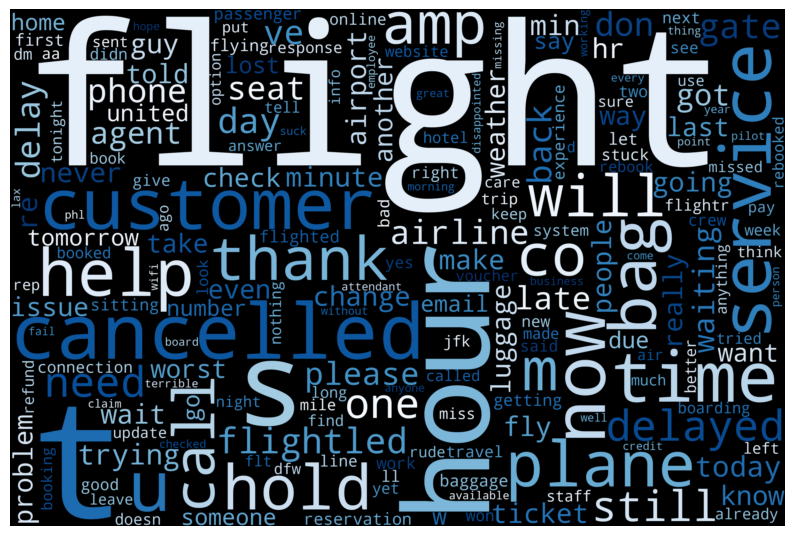

In [20]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in dataset2['text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

MENAMPILKAN JUMLAH SENTIMEN MELALUI GAMBAR

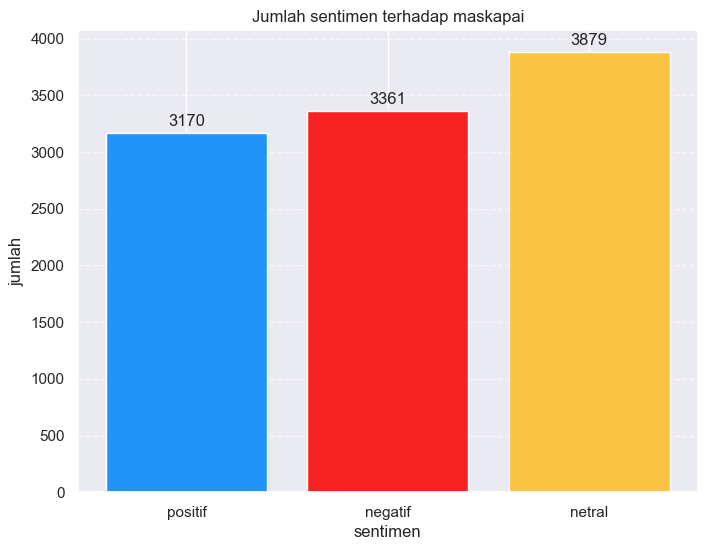

In [21]:
sns.set_theme()

labels = ['positif','negatif','netral']
counts = [positive, negative, neutral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color = ['#2394f7', '#f72323','#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy = {bar.get_x() + bar.get_width() / 2, height},
                    xytext = (0, 3),
                    textcoords = 'offset points',
                    ha = 'center', va = 'bottom')
    ax.grid(axis='y', linestyle = '--', alpha=0.7)
    ax.set_xlabel('sentimen')
    ax.set_ylabel('jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Jumlah sentimen terhadap maskapai")

MENGONVERSI DATAFRAME KE DATA TUPLE

In [23]:
df = [tuple(x) for x in dataset2.to_records(index=False)]

MENGELOMPOKKAN DATA BERDASARKAN KATEGORI DAN SAMPLING DATA SECARA ACAK

In [24]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset2:
    if(n[1] == 'positif'):
        set_positif.append(n)
    elif(n[1] == 'negatif'):
        set_negatif.append(n)
    else:
        set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral
train_set = []

for n in train:
    train_set.append(n)

MEMBUAT KLASIFIKASI MENGGUNAKAN MODEL RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [26]:
train_data, test_data = train_test_split(dataset2, test_size=0.2, random_state=42)

pipeline = make_pipeline(
    TfidfVectorizer(lowercase=True, ngram_range=(1, 2)),
    RandomForestClassifier())

parameters = {
    'tfidfvectorizer__max_df': [0.75, 0.85, 1.0],
    'tfidfvectorizer__min_df': [1, 2, 5],
    'randomforestclassifier__n_estimators' : [100, 200, 300], 
    'randomforestclassifier__max_depth' : [None, 10, 20], 
    'randomforestclassifier__min_samples_split' : [2, 5, 10], 
    'randomforestclassifier__min_samples_leaf' : [1, 2, 4], 
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, cv=5)
grid_search.fit(train_data['text'], train_data['classification'])

best_model = grid_search.best_estimator_
predicted_labels = best_model.predict(test_data['text'])

accuracy = accuracy_score(test_data['classification'], predicted_labels)
print('Akurasi: ', accuracy)

Akurasi:  0.808837656099904


MEMBUAT METRIK EVALUASI MENGGUNAKAN PRESISI, RECALL DAN F1-SCORE

In [27]:
from sklearn.metrics import classification_report

report = classification_report(test_data['classification'], predicted_labels)
print('Evaluation Metric:\n', report)

Evaluation Metric:
               precision    recall  f1-score   support

    Negative       0.87      0.71      0.78       662
     Neutral       0.76      0.97      0.85       776
    Positive       0.84      0.73      0.78       644

    accuracy                           0.81      2082
   macro avg       0.82      0.80      0.80      2082
weighted avg       0.82      0.81      0.81      2082

